In [79]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')



In [80]:
BGL_for_OneClass= pd.read_csv("output/unsupervised/BGL_all_params.csv")

In [81]:
BGL_for_OneClass.head()

,Unnamed: 0,timestamp,text,label,filename,clusters,p-15-0,p-15-1,p-16-0,p-16-1,p-17-0
0,0,1.117868e+12,RAS LINKCARD INFO MidplaneSwitchController per...,False,R33-M1-L0-U22-C,15,NaN,NaN,NaN,NaN,NaN
1,1,1.117868e+12,RAS LINKCARD INFO MidplaneSwitchController per...,False,R27-M1-L3-U18-C,15,NaN,NaN,NaN,NaN,NaN
2,2,1.117869e+12,RAS LINKCARD INFO MidplaneSwitchController per...,False,R33-M1-L0-U22-C,15,NaN,NaN,NaN,NaN,NaN
3,3,1.117869e+12,RAS LINKCARD INFO MidplaneSwitchController per...,False,R27-M1-L3-U18-C,15,NaN,NaN,NaN,NaN,NaN
4,4,1.117870e+12,RAS APP FATAL ciod: LOGIN chdir(/p/gb2/draeger...,False,R23-M0-N4-I:J18-U11,16,NaN,NaN,NaN,NaN,NaN


In [82]:
one_hot_encoded_BGL = pd.get_dummies(BGL_for_OneClass['clusters'])
one_hot_encoded_BGL.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [83]:
for col in one_hot_encoded_BGL.columns:
    col_name= "c"+str(col)
    BGL_for_OneClass[col_name]=one_hot_encoded_BGL[col]

In [84]:
BGL_for_OneClass.head

<bound method NDFrame.head of        Unnamed: 0     timestamp  \
0               0  1.117868e+12   
1               1  1.117868e+12   
2               2  1.117869e+12   
3               3  1.117869e+12   
4               4  1.117870e+12   
...           ...           ...   
99995       99995  1.119257e+12   
99996       99996  1.119257e+12   
99997       99997  1.119257e+12   
99998       99998  1.119257e+12   
99999       99999  1.119257e+12   

                                                    text  label  \
0      RAS LINKCARD INFO MidplaneSwitchController per...  False   
1      RAS LINKCARD INFO MidplaneSwitchController per...  False   
2      RAS LINKCARD INFO MidplaneSwitchController per...  False   
3      RAS LINKCARD INFO MidplaneSwitchController per...  False   
4      RAS APP FATAL ciod: LOGIN chdir(/p/gb2/draeger...  False   
...                                                  ...    ...   
99995  RAS APP FATAL ciod: failed to read message pre...   True   
99996  RAS AP

In [85]:
BGL_for_OneClass.fillna(0,inplace=True)

BGL_for_OneClass.drop(columns=['clusters','Unnamed: 0','timestamp','text','filename'], inplace=True)

BGL_for_OneClass.columns

Index(['label', 'p-15-0', 'p-15-1', 'p-16-0', 'p-16-1', 'p-17-0', 'c0', 'c1',
       'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12',
       'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19'],
      dtype='object')

# One class SVM

In [86]:
from sklearn.svm import OneClassSVM
from numpy import quantile, where, random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [87]:
le = LabelEncoder()
X = BGL_for_OneClass.drop('label', axis =1)
y = le.fit_transform(BGL_for_OneClass['label'])
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [88]:
oneclass = OneClassSVM(kernel='rbf',gamma='auto').fit(X_train)
y_pred = oneclass.predict(X_test)
y_pred = [1 if i==-1 else 0 for i in y_pred]


Train Result:
Accuracy Score: 90.36%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      1.000000     0.441027  0.903636      0.720513      0.957501
recall         0.895707     1.000000  0.903636      0.947853      0.903636
f1-score       0.944985     0.612101  0.903636      0.778543      0.919675
support    30491.000000  2509.000000  0.903636  33000.000000  33000.000000
_______________________________________________
Confusion Matrix: 
 [[27311  3180]
 [    0  2509]]

_______________________________________________
Recall Score: 
 1.0
_______________________________________________
Roc AUC Score: 
 0.9478534649568725


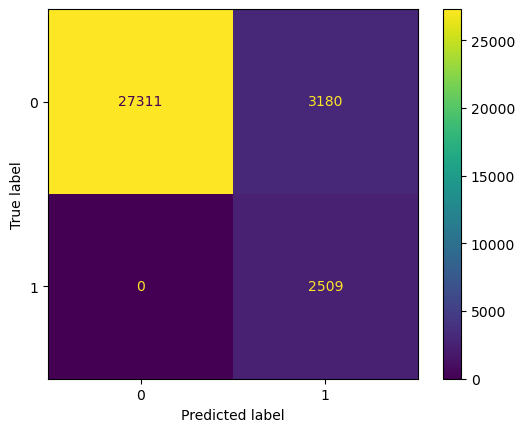

In [89]:
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, \
accuracy_score, confusion_matrix ,f1_score, precision_score, recall_score, auc
oneClass_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
print("Train Result:\n================================================")        
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{oneClass_report}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}\n")
print("_______________________________________________")
print(f'Recall Score: \n {recall_score(y_test, y_pred)}')
print("_______________________________________________")
print(f'Roc AUC Score: \n {roc_auc_score(y_test, y_pred)}')

oneClass_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

